In [1]:
# import libraries
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# hyperparameters
latent_size = 64
hidden_size = 256
image_size = 28*28
num_epochs = 10
batch_size = 100
lr = 0.0002

In [3]:
# load dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [4]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )

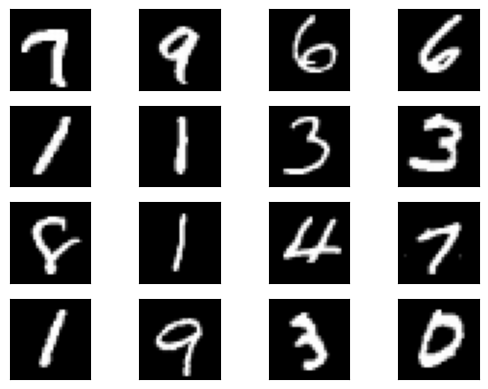

In [5]:
# dataset examples
image, labels = next(iter(train_loader))
for i in range(16):
  ax = plt.subplot(4, 4, i+1)
  plt.imshow(image[i].reshape(28,28), cmap = 'gray')
  plt.xticks([])
  plt.yticks([])

In [6]:
# Discriminator
class Discriminator(nn.Module):
    def __init__(self, image_size, hidden_size):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(image_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        return out
# Generator
class Generator(nn.Module):
    def __init__(self, latent_size, hidden_size, image_size):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(latent_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, image_size)
        self.tanh = nn.Tanh()
        # self.sigmoid = nn.Sigmoid()

        
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.tanh(out)
        # out = self.sigmoid(out)
        return out


In [7]:
criterion = nn.BCELoss()

Epoch [0/10], Step [0/600], D_real_loss: 0.6383, D_fake_loss: 0.6898, G_loss: 0.7011
Epoch [0/10], Step [100/600], D_real_loss: 0.1198, D_fake_loss: 0.7794, G_loss: 0.7813
Epoch [0/10], Step [200/600], D_real_loss: 0.0973, D_fake_loss: 0.1521, G_loss: 2.2247
Epoch [0/10], Step [300/600], D_real_loss: 0.1700, D_fake_loss: 0.3458, G_loss: 1.3314
Epoch [0/10], Step [400/600], D_real_loss: 0.4009, D_fake_loss: 0.7940, G_loss: 0.7188
Epoch [0/10], Step [500/600], D_real_loss: 0.1922, D_fake_loss: 0.3007, G_loss: 1.6601


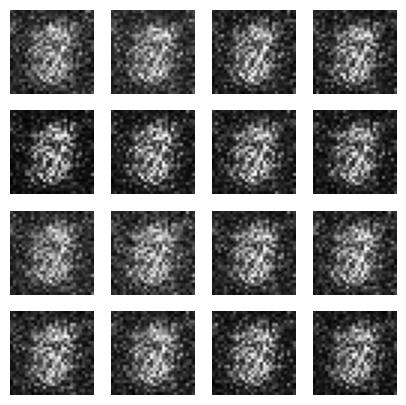

Epoch [1/10], Step [0/600], D_real_loss: 0.1313, D_fake_loss: 0.1726, G_loss: 2.0020
Epoch [1/10], Step [100/600], D_real_loss: 0.3314, D_fake_loss: 0.4884, G_loss: 1.0786
Epoch [1/10], Step [200/600], D_real_loss: 0.4614, D_fake_loss: 0.7401, G_loss: 0.7458
Epoch [1/10], Step [300/600], D_real_loss: 0.3675, D_fake_loss: 0.5265, G_loss: 0.9848
Epoch [1/10], Step [400/600], D_real_loss: 0.3756, D_fake_loss: 0.5534, G_loss: 1.1533
Epoch [1/10], Step [500/600], D_real_loss: 0.1518, D_fake_loss: 0.1797, G_loss: 1.9740


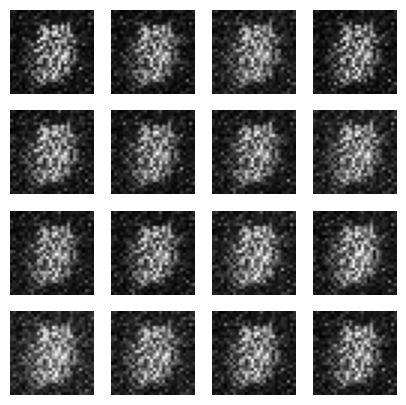

Epoch [2/10], Step [0/600], D_real_loss: 0.6002, D_fake_loss: 0.7462, G_loss: 0.7231
Epoch [2/10], Step [100/600], D_real_loss: 0.3883, D_fake_loss: 0.6369, G_loss: 0.9805
Epoch [2/10], Step [200/600], D_real_loss: 0.4188, D_fake_loss: 0.5008, G_loss: 1.1433
Epoch [2/10], Step [300/600], D_real_loss: 0.2206, D_fake_loss: 0.3101, G_loss: 1.5284
Epoch [2/10], Step [400/600], D_real_loss: 0.3067, D_fake_loss: 0.3282, G_loss: 1.5219
Epoch [2/10], Step [500/600], D_real_loss: 0.3458, D_fake_loss: 0.5089, G_loss: 1.0546


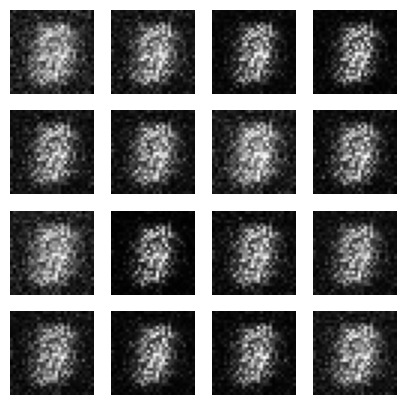

Epoch [3/10], Step [0/600], D_real_loss: 0.2848, D_fake_loss: 0.3224, G_loss: 1.3497
Epoch [3/10], Step [100/600], D_real_loss: 0.6336, D_fake_loss: 0.8029, G_loss: 0.6937
Epoch [3/10], Step [200/600], D_real_loss: 0.2853, D_fake_loss: 0.2516, G_loss: 1.6123
Epoch [3/10], Step [300/600], D_real_loss: 0.6656, D_fake_loss: 0.7122, G_loss: 0.7531
Epoch [3/10], Step [400/600], D_real_loss: 0.6191, D_fake_loss: 0.6580, G_loss: 0.8246
Epoch [3/10], Step [500/600], D_real_loss: 0.2980, D_fake_loss: 0.2853, G_loss: 1.5574


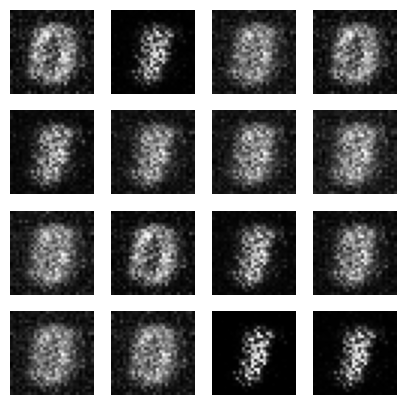

Epoch [4/10], Step [0/600], D_real_loss: 0.3959, D_fake_loss: 0.6863, G_loss: 0.9781
Epoch [4/10], Step [100/600], D_real_loss: 0.7839, D_fake_loss: 0.6581, G_loss: 0.8454
Epoch [4/10], Step [200/600], D_real_loss: 0.4489, D_fake_loss: 0.4733, G_loss: 1.1503
Epoch [4/10], Step [300/600], D_real_loss: 0.2871, D_fake_loss: 0.3822, G_loss: 1.5094
Epoch [4/10], Step [400/600], D_real_loss: 0.6829, D_fake_loss: 0.6661, G_loss: 0.8314
Epoch [4/10], Step [500/600], D_real_loss: 0.3410, D_fake_loss: 0.4260, G_loss: 1.1767


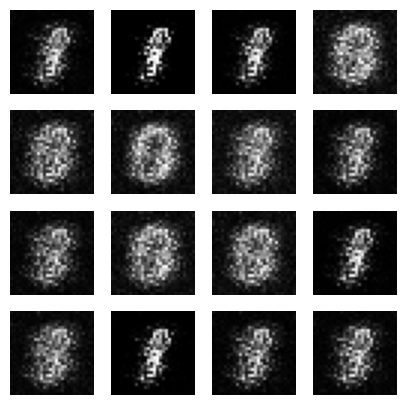

Epoch [5/10], Step [0/600], D_real_loss: 0.6006, D_fake_loss: 0.6419, G_loss: 0.8973
Epoch [5/10], Step [100/600], D_real_loss: 0.3923, D_fake_loss: 0.3848, G_loss: 1.3355
Epoch [5/10], Step [200/600], D_real_loss: 0.5230, D_fake_loss: 0.5251, G_loss: 0.9205
Epoch [5/10], Step [300/600], D_real_loss: 0.5596, D_fake_loss: 0.7866, G_loss: 0.7498
Epoch [5/10], Step [400/600], D_real_loss: 0.2121, D_fake_loss: 0.1779, G_loss: 1.8548
Epoch [5/10], Step [500/600], D_real_loss: 0.7006, D_fake_loss: 0.7844, G_loss: 0.6238


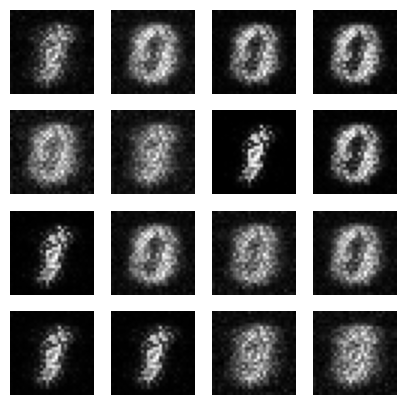

Epoch [6/10], Step [0/600], D_real_loss: 0.5737, D_fake_loss: 0.7045, G_loss: 0.7340
Epoch [6/10], Step [100/600], D_real_loss: 0.6706, D_fake_loss: 0.6738, G_loss: 0.7308
Epoch [6/10], Step [200/600], D_real_loss: 0.6303, D_fake_loss: 0.5423, G_loss: 0.8959
Epoch [6/10], Step [300/600], D_real_loss: 0.5495, D_fake_loss: 0.5859, G_loss: 0.9128
Epoch [6/10], Step [400/600], D_real_loss: 0.4789, D_fake_loss: 0.5448, G_loss: 0.9565
Epoch [6/10], Step [500/600], D_real_loss: 0.5470, D_fake_loss: 0.5411, G_loss: 0.9628


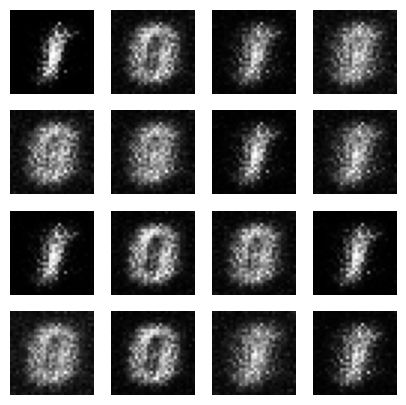

Epoch [7/10], Step [0/600], D_real_loss: 0.6306, D_fake_loss: 0.5759, G_loss: 0.9511
Epoch [7/10], Step [100/600], D_real_loss: 0.6789, D_fake_loss: 0.6612, G_loss: 0.8740
Epoch [7/10], Step [200/600], D_real_loss: 0.3447, D_fake_loss: 0.4413, G_loss: 1.1448
Epoch [7/10], Step [300/600], D_real_loss: 0.4664, D_fake_loss: 0.5439, G_loss: 0.9403
Epoch [7/10], Step [400/600], D_real_loss: 0.5759, D_fake_loss: 0.4889, G_loss: 1.2319
Epoch [7/10], Step [500/600], D_real_loss: 0.8067, D_fake_loss: 0.5389, G_loss: 0.9698


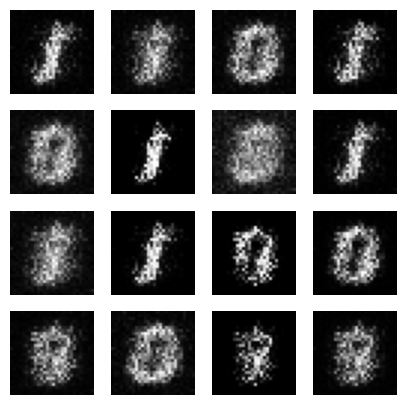

Epoch [8/10], Step [0/600], D_real_loss: 0.4693, D_fake_loss: 0.4134, G_loss: 1.3412
Epoch [8/10], Step [100/600], D_real_loss: 0.5687, D_fake_loss: 0.5057, G_loss: 1.1038
Epoch [8/10], Step [200/600], D_real_loss: 0.4961, D_fake_loss: 0.3759, G_loss: 1.2585
Epoch [8/10], Step [300/600], D_real_loss: 0.5963, D_fake_loss: 0.4588, G_loss: 1.2046
Epoch [8/10], Step [400/600], D_real_loss: 0.6739, D_fake_loss: 0.6106, G_loss: 1.0570
Epoch [8/10], Step [500/600], D_real_loss: 0.3269, D_fake_loss: 0.5471, G_loss: 1.2185


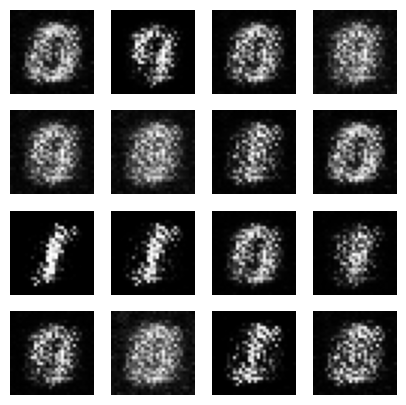

Epoch [9/10], Step [0/600], D_real_loss: 0.5540, D_fake_loss: 0.6054, G_loss: 1.0842
Epoch [9/10], Step [100/600], D_real_loss: 0.5857, D_fake_loss: 0.6268, G_loss: 0.9255
Epoch [9/10], Step [200/600], D_real_loss: 0.5114, D_fake_loss: 0.3975, G_loss: 1.4292
Epoch [9/10], Step [300/600], D_real_loss: 0.4160, D_fake_loss: 0.4858, G_loss: 1.3777
Epoch [9/10], Step [400/600], D_real_loss: 0.2126, D_fake_loss: 0.2538, G_loss: 1.9906
Epoch [9/10], Step [500/600], D_real_loss: 0.2922, D_fake_loss: 0.3655, G_loss: 1.4293


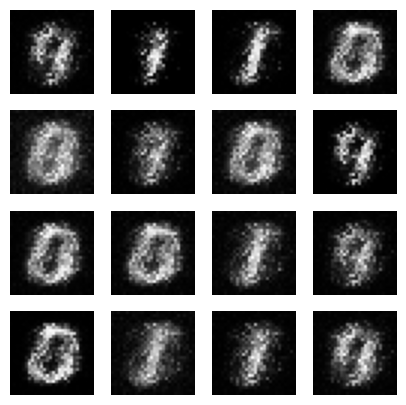

In [8]:
# Model initialization
D = Discriminator(image_size, hidden_size)
G = Generator(latent_size, hidden_size, image_size)

# Optimizers
D_optimizer = torch.optim.Adam(D.parameters(), lr=lr)
G_optimizer = torch.optim.Adam(G.parameters(), lr=lr)

# Train models
for epoch in range(num_epochs):
    for i, (images, _) in enumerate(train_loader):
        # Train discriminator with real images
        D_optimizer.zero_grad()
        real_images = images.reshape(-1, image_size) # real images
        real_labels = torch.ones(batch_size, 1) # real labels
        real_outputs = D(real_images)
        D_real_loss = criterion(real_outputs, real_labels)
        D_real_loss.backward() # real loss

        # Train discriminator with fake images
        z = torch.randn(batch_size, latent_size)
        fake_images = G(z) # fake images 
        fake_labels = torch.zeros(batch_size, 1) #fake labels
        fake_outputs = D(fake_images.detach())
        D_fake_loss = criterion(fake_outputs, fake_labels)
        D_fake_loss.backward() # fake loss
        D_optimizer.step()

        # Train generator
        G_optimizer.zero_grad()
        z = torch.randn(batch_size, latent_size)
        fake_images = G(z) # fake images with generator
        fake_labels = torch.ones(batch_size, 1)
        fake_outputs = D(fake_images)
        G_loss = criterion(fake_outputs, fake_labels)
        G_loss.backward() # generator loss
        G_optimizer.step()

        # Print loss
        if i % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], D_real_loss: {:.4f}, D_fake_loss: {:.4f}, G_loss: {:.4f}'
                  .format(epoch, num_epochs, i, len(train_loader), D_real_loss.item(), D_fake_loss.item(), G_loss.item()))

    # Visualize generated images
    with torch.no_grad():
        z = torch.randn(16, latent_size)
        generated_images = G(z)
        generated_images = generated_images.reshape(-1, 28, 28)
        plt.figure(figsize=(5,5))
        for j in range(16):
            plt.subplot(4, 4, j+1)
            plt.imshow(generated_images[j], cmap='gray')
            plt.axis('off')
        plt.savefig('generated_images_epoch_{}.png'.format(epoch))
        plt.show()
